# Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import os
import joblib

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings 
warnings.filterwarnings('ignore')


In [2]:
train_data = pd.read_csv('tabular-playground-series-jun-2021/train.csv')
test_data = pd.read_csv('tabular-playground-series-jun-2021/test.csv')
submission_data = pd.read_csv('tabular-playground-series-jun-2021/sample_submission.csv')

# Training Data

In [3]:
train_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2


In [4]:
print('Number of Rows : {}\nNumber of Columns : {}'.format(
    train_data.shape[0], train_data.shape[1]))


Number of Rows : 200000
Number of Columns : 77


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

## Handling Missing Values

In [6]:
train_data_ = train_data.drop(columns='target',axis=1)

In [7]:
train_data_.isnull().sum()

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
feature_51    0
feature_52    0
feature_53    0
feature_54    0
feature_55    0
feature_56    0
feature_57    0
feature_58    0
feature_59    0
feature_60    0
feature_

## Analysing Target Variable (i.e target)

In [8]:
train_data['target'].describe()

count      200000
unique          9
top       Class_6
freq        51811
Name: target, dtype: object

In [9]:
train_data['target'].value_counts()

Class_6    51811
Class_8    51763
Class_9    25542
Class_2    24431
Class_3    14798
Class_7    14769
Class_1     9118
Class_4     4704
Class_5     3064
Name: target, dtype: int64

<Figure size 720x576 with 0 Axes>

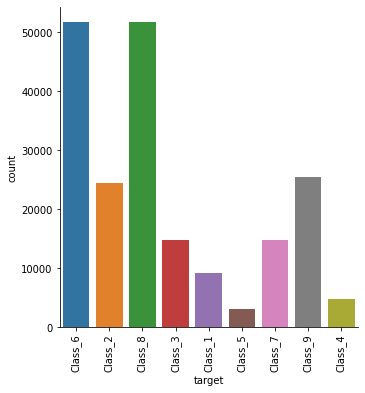

In [10]:
plt.figure(figsize=(10,8))
sns.catplot(x=train_data['target'], data=train_data, kind='count')
plt.xticks(rotation=90)
plt.show()


# Test Dataset

In [11]:
test_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
print('Number of Rows : {}\nNumber of Columns : {}'.format(
    test_data.shape[0], test_data.shape[1]))


Number of Rows : 100000
Number of Columns : 76


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   id          100000 non-null  int64
 1   feature_0   100000 non-null  int64
 2   feature_1   100000 non-null  int64
 3   feature_2   100000 non-null  int64
 4   feature_3   100000 non-null  int64
 5   feature_4   100000 non-null  int64
 6   feature_5   100000 non-null  int64
 7   feature_6   100000 non-null  int64
 8   feature_7   100000 non-null  int64
 9   feature_8   100000 non-null  int64
 10  feature_9   100000 non-null  int64
 11  feature_10  100000 non-null  int64
 12  feature_11  100000 non-null  int64
 13  feature_12  100000 non-null  int64
 14  feature_13  100000 non-null  int64
 15  feature_14  100000 non-null  int64
 16  feature_15  100000 non-null  int64
 17  feature_16  100000 non-null  int64
 18  feature_17  100000 non-null  int64
 19  feature_18  100000 non-null  int64
 20  featu

In [14]:
test_data.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,249999.500000,0.99051,1.168520,2.182730,2.316240,0.792050,1.435520,1.016930,0.679780,1.945370,1.716100,1.392320,1.004740,2.433260,1.061720,1.409220,1.359410,1.385640,0.315960,1.656700,6.258360,1.44348,1.029740,1.429920,0.57528,1.063300,2.366270,0.777330,0.78862,2.270520,1.570310,0.595990,1.855500,1.534080,1.577660,0.691960,1.165710,0.67222,1.517700,1.277600,2.298310,1.270210,1.13958,0.830240,4.512870,0.893290,0.677300,2.403370,0.978220,1.507760,0.466210,2.26074,1.62295,0.614610,1.332240,6.017970,2.469710,2.129070,0.567190,0.918490,1.341170,1.644870,1.284640,2.740550,1.457280,0.700040,1.797590,0.50930,1.793660,0.909660,1.616010,1.201490,0.798630,1.313360,2.93515,0.64209
std,28867.657797,4.01893,4.030234,6.402817,7.584742,2.938386,5.164174,3.956569,2.262651,3.938406,5.876687,3.194114,3.915981,3.419176,3.669671,2.875413,8.002172,3.038772,1.032095,2.550535,14.230285,2.69081,2.938303,6.688267,1.68714,5.696616,7.362339,1.748136,3.48654,8.288223,5.597365,1.388397,3.874141,7.885321,3.980732,2.304119,3.445697,2.65910,2.930036,4.296296,4.443145,4.581782,5.32028,3.475411,7.846887,2.189349,2.134598,9.823958,5.950355,4.350373,2.007346,5.17950,5.21433,1.944722,2.888467,11.391307,8.731884,4.138896,2.050543,2.657897,6.216216,6.265474,5.466053,8.141103,7.160207,2.174394,5.075318,1.87308,7.071364,3.797739,4.944454,4.784381,2.427921,4.443859,10.78833,3.98134
min,200000.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,224999.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

# Features

In [15]:
features = [feature for feature in train_data.columns if feature not in ['id','target']]

## Unique Values

In [16]:
unique_values_train = np.zeros(2)

for feature in features:
    temp = train_data[feature].unique()
    unique_values_train = np.concatenate([unique_values_train ,temp])
unique_values_train = np.unique(unique_values_train) 


unique_values_test = np.zeros(2)

for feature in features:
    temp = train_data[feature].unique()
    unique_values_test = np.concatenate([unique_values_test, temp])
unique_values_test = np.unique(unique_values_test)


In [17]:
unique_values_feature_train = pd.DataFrame(train_data[features].nunique()).reset_index(drop=False) 

unique_values_feature_train.columns = ['Feature' ,'Count']

unique_values_feature_test = pd.DataFrame(
    test_data[features].nunique()).reset_index(drop=False)

unique_values_feature_test.columns = ['Feature', 'Count']


unique_values_feature_diff = unique_values_feature_train.copy()
unique_values_feature_diff['Count'] = unique_values_feature_train['Count'] - unique_values_feature_test['Count']

unique_values_feature_diff = unique_values_feature_diff[unique_values_feature_diff['Count'] != 0]


In [18]:
# transpose_features_train = train_data[features]
# transpose_features_train = transpose_features_train.apply(pd.Series.value_counts ,axis=1).fillna(0)

# transpose_features_test = test_data[features]
# transpose_features_test = transpose_features_test.apply(
#     pd.Series.value_counts, axis=1).fillna(0)


## Plotting Unique Values

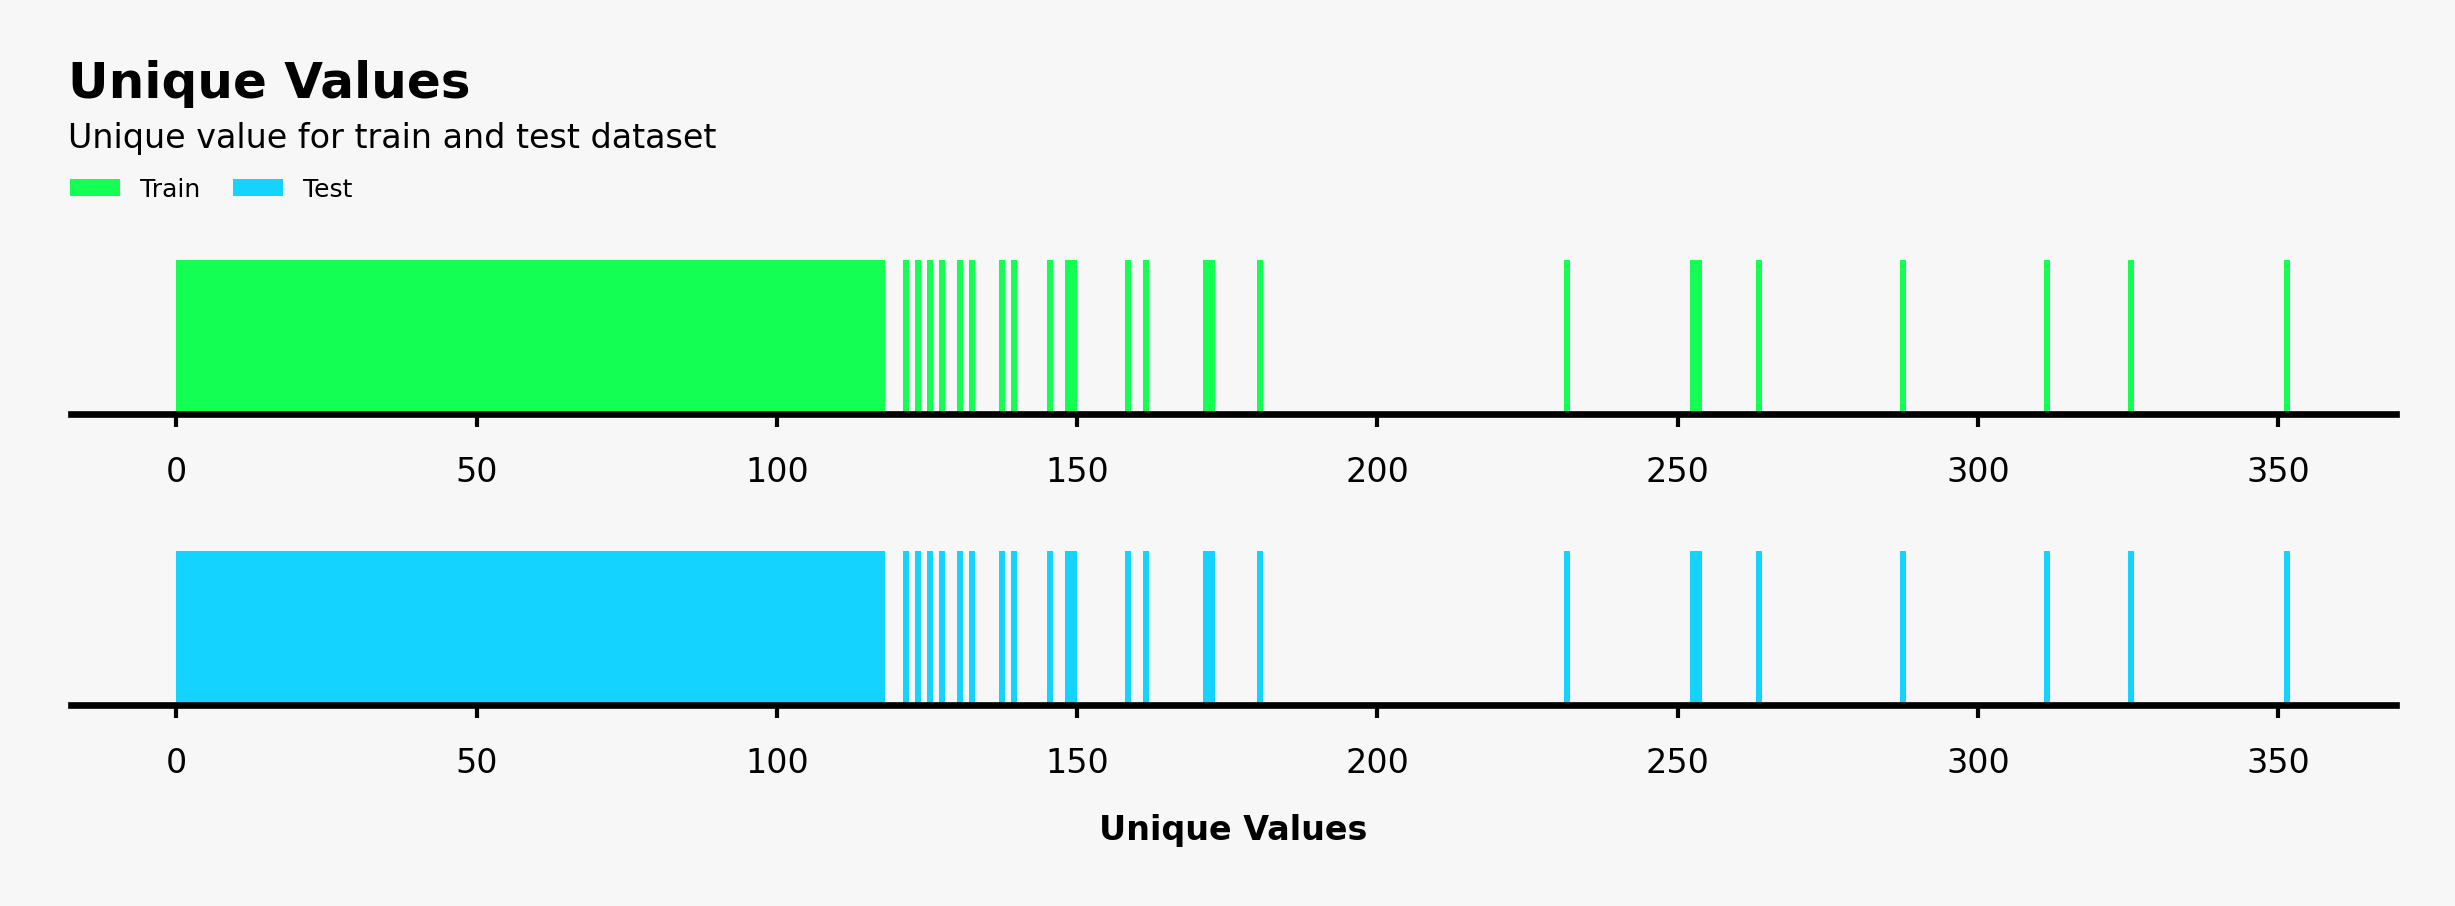

In [19]:
plt.rcParams['figure.dpi'] = 600 
fig = plt.figure(figsize=(5, 1), facecolor='#f7f7f7')
gs = fig.add_gridspec(2,1)
gs.update(wspace=0.4 ,hspace=0.8)

#-------------------------------------------------#

background_color = '#f7f7f7'
sns.set_palette(['#14ff53'])

fig_ax0 = fig.add_subplot(gs[0,0])
for i in ['right','top' ,'left']:
    fig_ax0.spines[i].set_visible(False)

fig_ax0.set_facecolor(background_color)
fig_ax0.tick_params(axis='y' ,which='both' ,left=False)

fig_ax0_sns = sns.histplot(ax=fig_ax0 ,x=unique_values_train ,zorder=2 ,bins=352 ,linewidth=0 ,alpha=1)
# fig_ax0_sns.set_xlabel('Unique Values', fontsize=4,
#                        weight='bold', color='black')
fig_ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5, color='black')
fig_ax0_sns.get_yaxis().set_visible(False)

fig_ax0_sns.legend(['Train', 'Test'], ncol=2, facecolor=background_color,
                edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.6), loc='upper left')

#-------------------------------------------------#

fig_ax0.text(-18, 2.3, 'Unique Values', fontsize=6,
             ha='left', va='top', weight='bold', color='black')
fig_ax0.text(-18, 1.9, 'Unique value for train and test dataset',
             fontsize=4, ha='left', va='top', color='black')

#-------------------------------------------------#

background_color = '#f7f7f7'
sns.set_palette(['#14d4ff'])

fig_ax1 = fig.add_subplot(gs[1, 0])
for i in ['right', 'top', 'left']:
    fig_ax1.spines[i].set_visible(False)

fig_ax1.set_facecolor(background_color)
fig_ax1.tick_params(axis='y', which='both', left=False, color='black')

fig_ax1_sns = sns.histplot(
    ax=fig_ax1, x=unique_values_test, zorder=2, bins=352, linewidth=0, alpha=1)
fig_ax1_sns.set_xlabel('Unique Values', fontsize=4, weight='bold',color='black')
fig_ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5, color='black')
fig_ax1_sns.get_yaxis().set_visible(False)

fig_ax1_sns.legend(['Test'], ncol=2, facecolor=background_color,
                   edgecolor=background_color, fontsize=3, bbox_to_anchor=(0.06, 3.4), loc='upper left')

plt.show()


### Observations:

### There are some differences of unique values between train and test dataset for value above 100. Both train and test dataset has a range from 0 to 352.

## Individual Features (Unique Values)

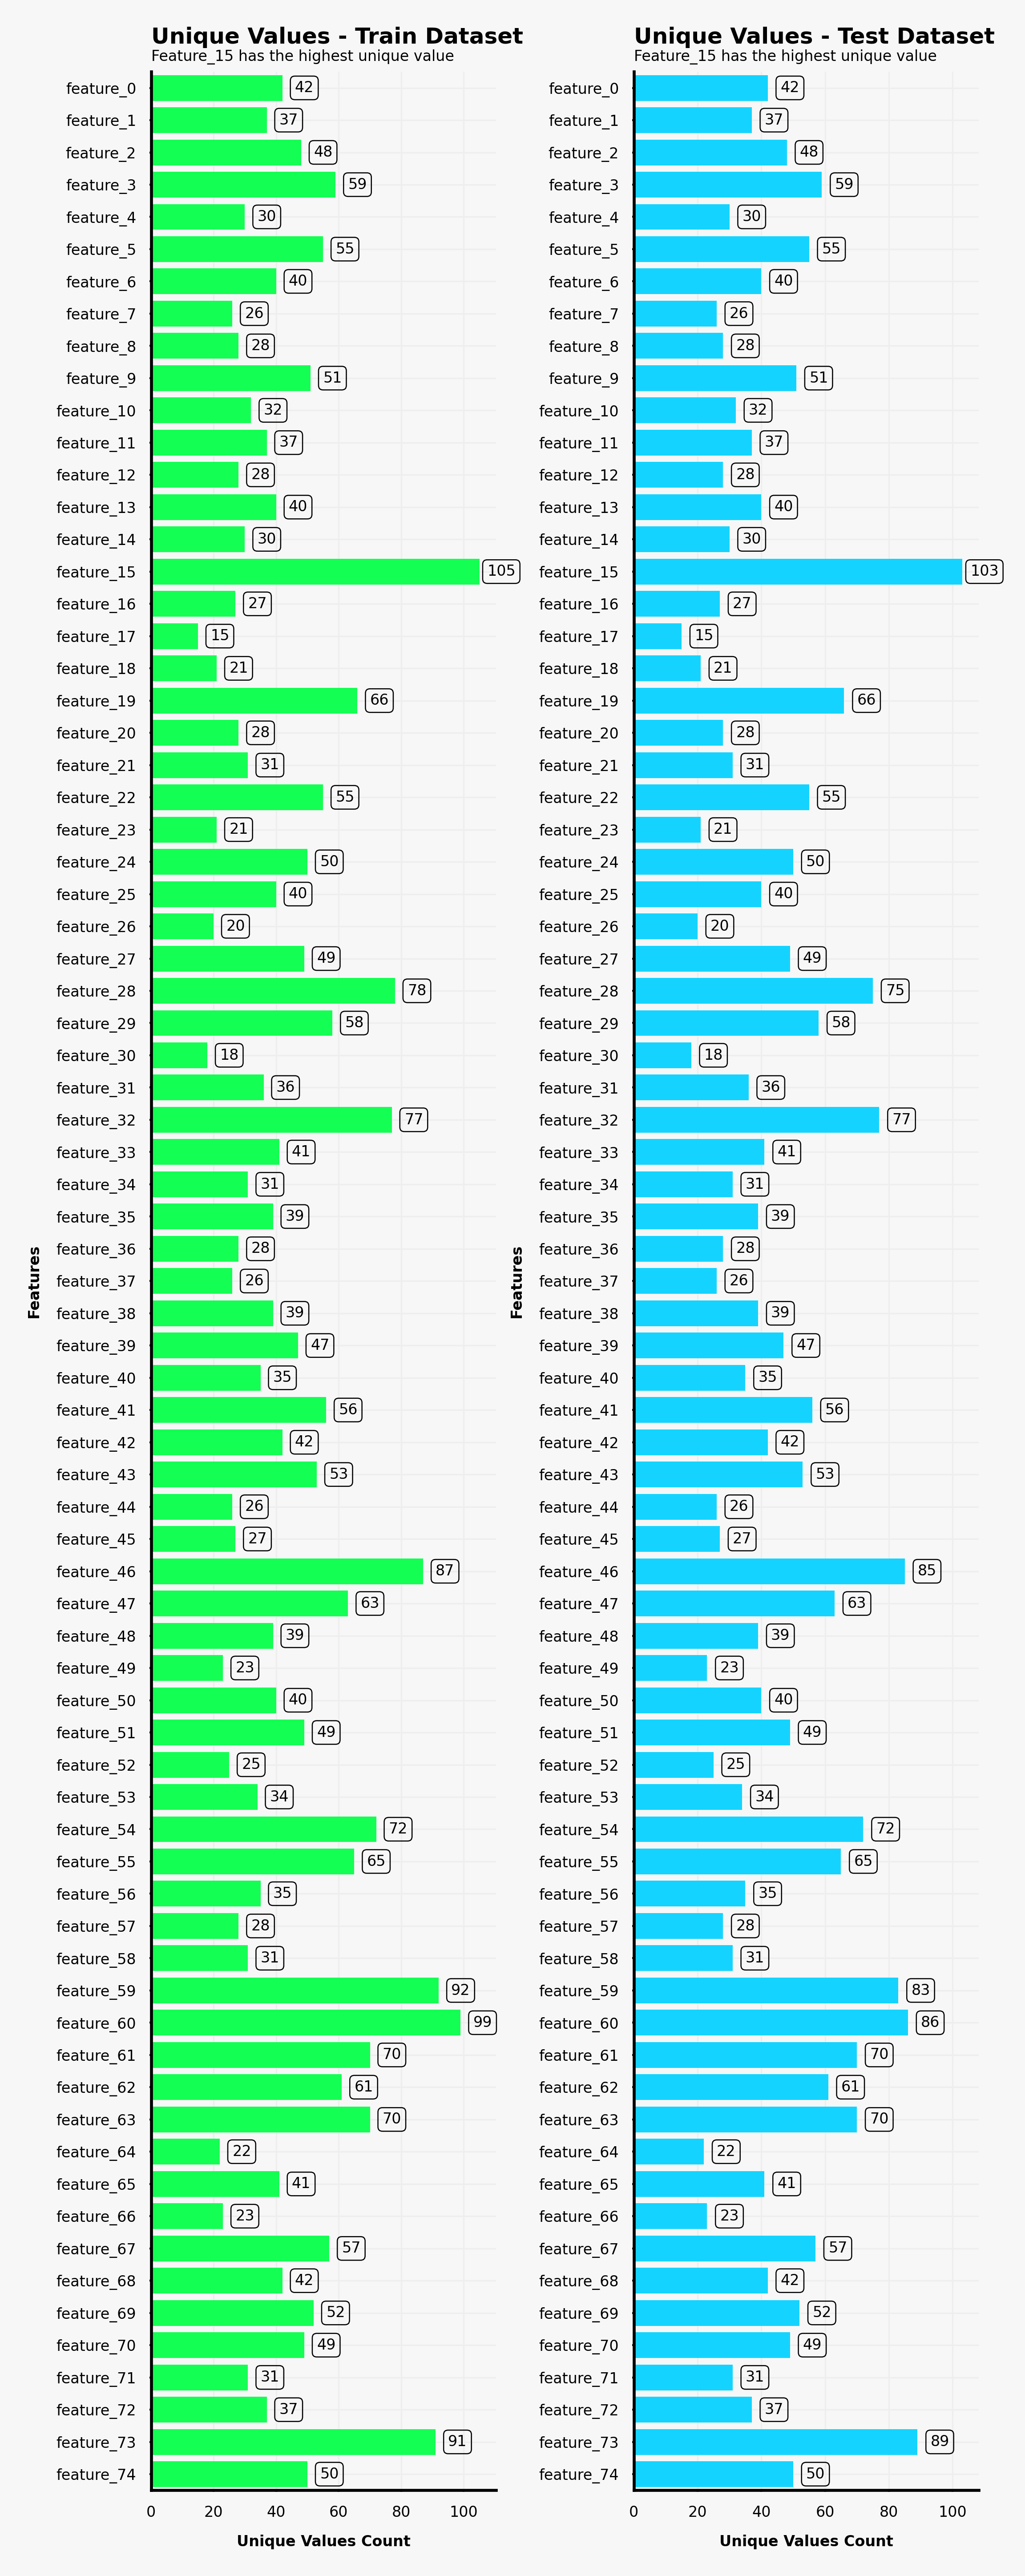

In [20]:
plt.rcParams['figure.dpi'] = 600 
fig = plt.figure(figsize=(4, 12), facecolor='#f7f7f7')
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.4 ,hspace=0.1)

#------------------------------------------------# 

background_color = '#f7f7f7'
sns.set_palette(['#14ff53']*75)

#------------------------------------------------#

fig_ax0 = fig.add_subplot(gs[0,0])
for i in ['right' ,'top']:
    fig_ax0.spines[i].set_visible(False)
fig_ax0.set_facecolor(background_color)

fig_ax0_sns = sns.barplot(ax=fig_ax0 ,y=unique_values_feature_train['Feature'] ,x=unique_values_feature_train['Count'] ,zorder=2 ,linewidth=0 ,orient='h',saturation=1 ,alpha=1)

fig_ax0_sns.set_xlabel('Unique Values Count' ,fontsize=4 ,weight='bold')
fig_ax0_sns.set_ylabel('Features' ,fontsize=4 ,weight='bold')
fig_ax0_sns.tick_params(labelsize=4 ,width=0.5 ,length=0.5)

#grid 
fig_ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
fig_ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

#text 
fig_ax0.text(0, -1.9, 'Unique Values - Train Dataset',fontsize=6, ha='left', va='top', weight='bold')
fig_ax0.text(0, -1.2, 'Feature_15 has the highest unique value',fontsize=4, ha='left', va='top')

# data-label 
for i in fig_ax0.patches:
    value =f'{i.get_width():.0f}'
    x = i.get_x() + i.get_width() + 7
    y = i.get_y() + i.get_height() / 2

    fig_ax0.text(x, y, value, ha='center', va='center', fontsize=4,bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

#------------------------------------------------#

background_color = '#f7f7f7'
sns.set_palette(['#14d4ff']*75)

#------------------------------------------------#

fig_ax1 = fig.add_subplot(gs[0, 1])
for i in ['right', 'top']:
    fig_ax1.spines[i].set_visible(False)
fig_ax1.set_facecolor(background_color)

fig_ax1_sns = sns.barplot(ax=fig_ax1, y=unique_values_feature_test['Feature'],
x=unique_values_feature_test['Count'], zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)

fig_ax1_sns.set_xlabel('Unique Values Count', fontsize=4, weight='bold')
fig_ax1_sns.set_ylabel('Features', fontsize=4, weight='bold')
fig_ax1_sns.tick_params(labelsize=4, width=0.5, length=0.5)

#grid
fig_ax1_sns.grid(which='major', axis='x', zorder=0,
                 color='#EEEEEE', linewidth=0.4)
fig_ax1_sns.grid(which='major', axis='y', zorder=0,
                 color='#EEEEEE', linewidth=0.4)

#text
fig_ax1.text(0, -1.9, 'Unique Values - Test Dataset',
             fontsize=6, ha='left', va='top', weight='bold')
fig_ax1.text(0, -1.2, 'Feature_15 has the highest unique value',
             fontsize=4, ha='left', va='top')

# data-label
for i in fig_ax1.patches:
    value = f'{i.get_width():.0f}'
    x = i.get_x() + i.get_width() + 7
    y = i.get_y() + i.get_height() / 2

    fig_ax1.text(x, y, value, ha='center', va='center', fontsize=4, bbox=dict(
        facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()


## Unique Values Difference

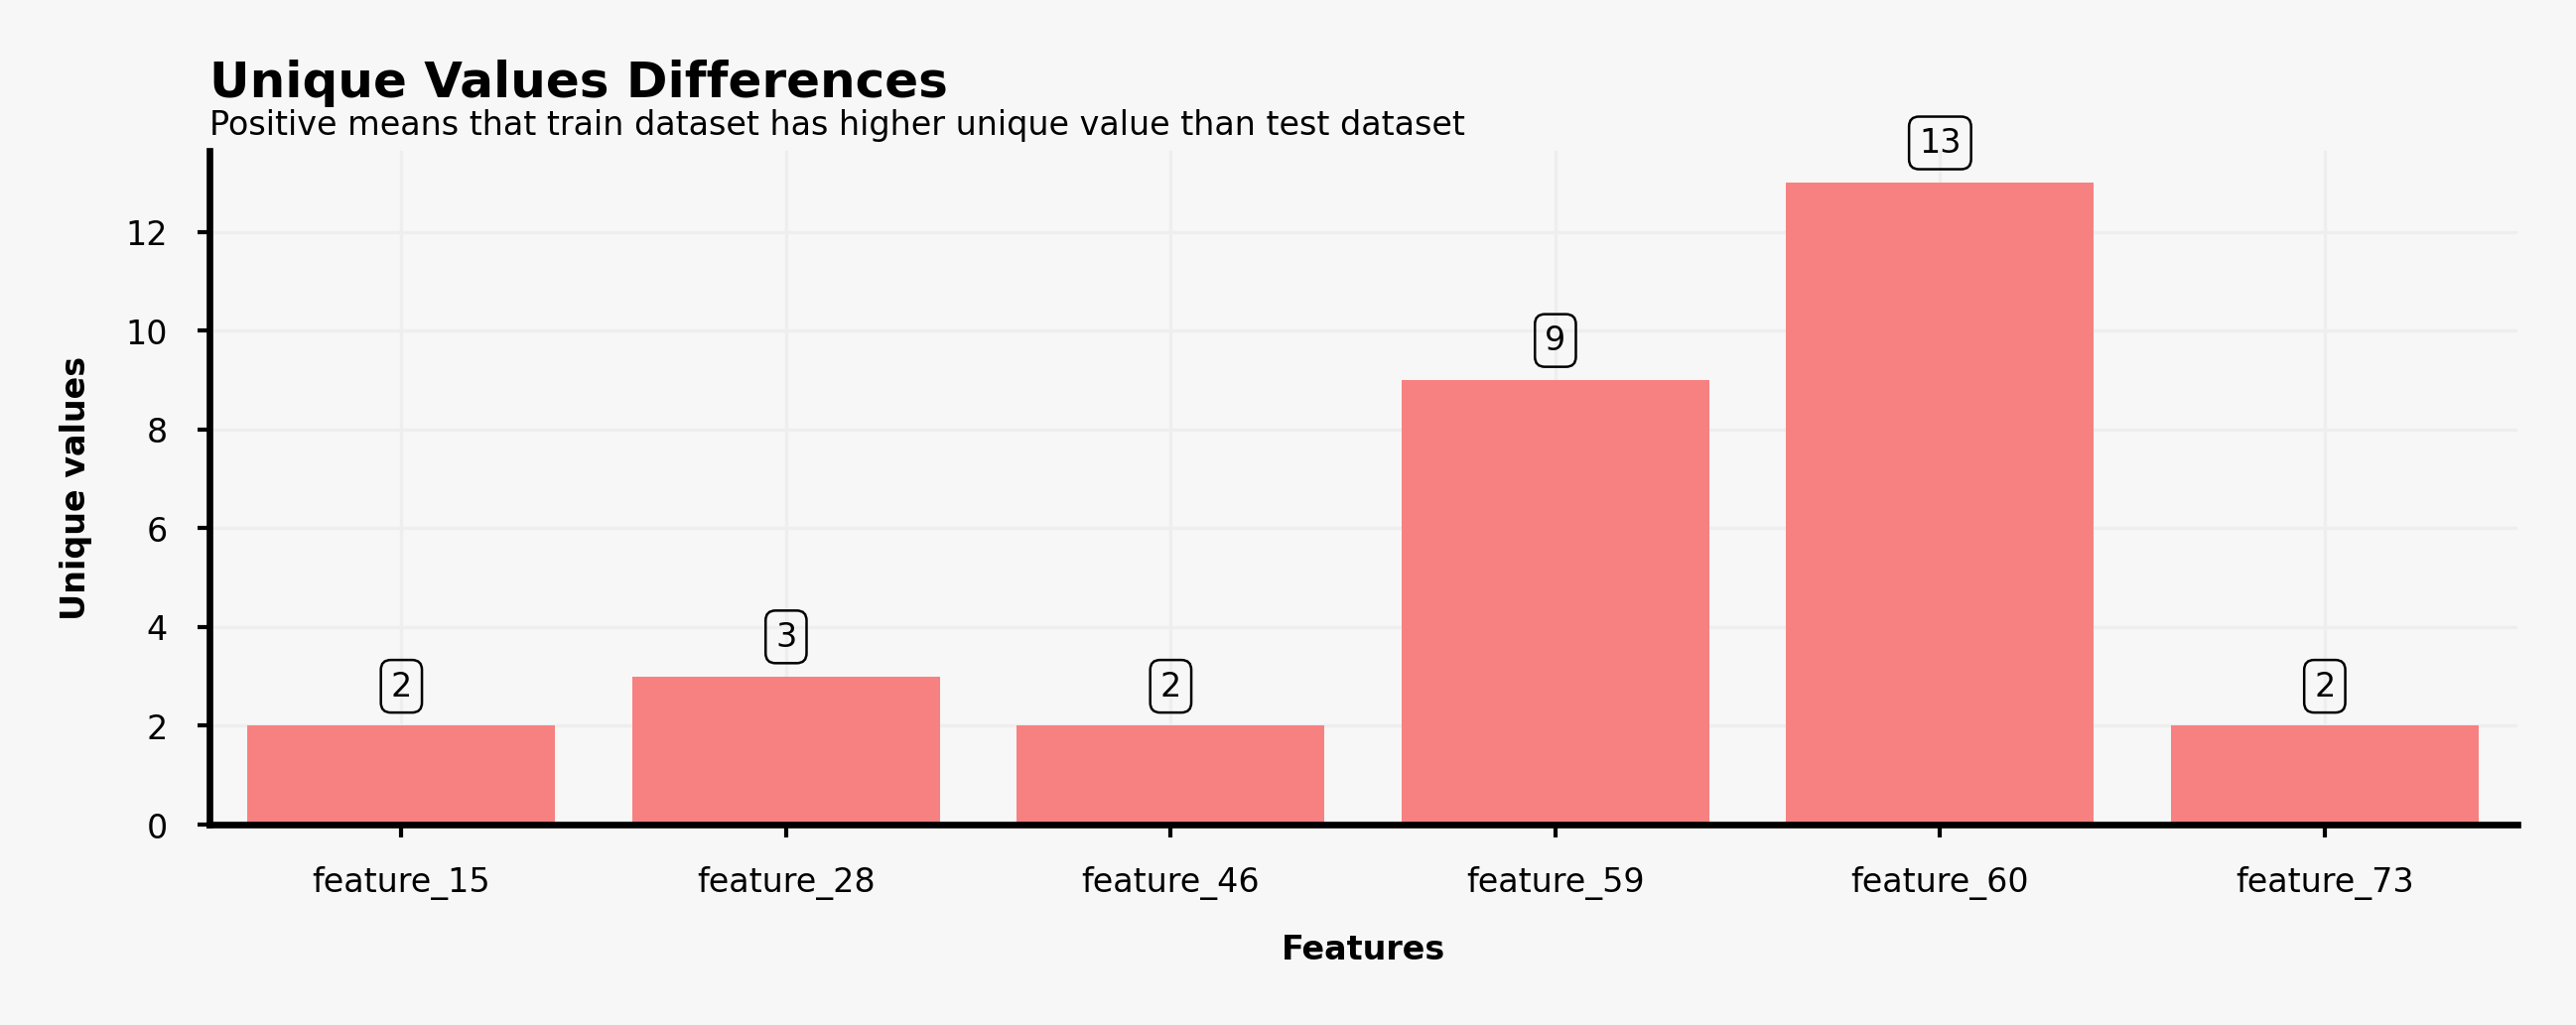

In [21]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 1.5), facecolor='#f7f7f7')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f7f7f7"
sns.set_palette(['#f78181']*6)

ax = fig.add_subplot(gs[0, 0])
for i in ["right", "top"]:
    ax.spines[i].set_visible(False)
    
ax.set_facecolor(background_color)

ax_sns = sns.barplot(ax=ax, x=unique_values_feature_diff['Feature'],
                     y=unique_values_feature_diff['Count'],
                     zorder=2, linewidth=0, alpha=1, saturation=1)

ax_sns.set_xlabel("Features", fontsize=4, weight='bold')
ax_sns.set_ylabel("Unique values", fontsize=4, weight='bold')

# grid
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)

#text
ax.text(-0.5, 15.5, 'Unique Values Differences',
        fontsize=6, ha='left', va='top', weight='bold')
ax.text(-0.5, 14.5, 'Positive means that train dataset has higher unique value than test dataset',fontsize=4, ha='left', va='top')

# data label
for p in ax.patches:
    percentage = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.8
    ax.text(x, y, percentage, ha='center', va='center', fontsize=4,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

plt.show()


### Observations : 
### feature_15 has the highest unique values that are above 100 followed by feature_46, feature_59, feature_60 and feature_73 with more than 80 unique values.
### There are differences between train and test dataset unique values on feature_15, feature_28, feature_46, feature_59, feature_60 and feature_73. The highest differences is from feature_60 which is more than 10.